In [20]:
import os
path='example.mp4'

In the first step, two successive frames are read and transformed with DWT to achieve four sub-bands, LL, HL, LH and HH. Within the four sub-bands, only three sub-bands, HL, LH and HH are used to detect key frame. For each sub-band, different value is estimated by subtracting detail component values of current and next frame. In the second step, Mean and Standard Deviation are computed from the difference values of each sub-band. In the step three, threshold value for each sub-band is calculated by adding the Mean and Standard Deviation. In final step, the threshold and difference value of each band are compared. If two difference values of any two sub-bands are over each related threshold, the last frame can be considered as a key frame.

In [21]:
try:
    if not os.path.exists('vsoutput'):
        os.makedirs('vsoutput')
except OSError:
    print("error creating directory")

As shown in figure 2, in the four sub-band transformed images, LL corresponds to a smooth version of original image. HL, LH and HH are the three coefficients of details. Hence, the obviously change in original image can cause the changes in coefficient values of the three sub bands 
DWT------------ DWT wavelet transformation --------> LL , HL, LH , HH 

In [22]:
import cv2
import numpy as np
import imutils
import os
import pywt

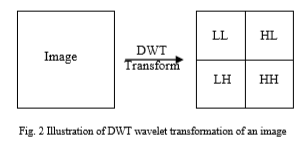

In [23]:
def array_frames_to_video(pathIn,pathOut,fps,a):
     
    cno=0
    frame_array = []
    cap = cv2.VideoCapture(path)
    while(True):
        ret,img =cap.read()
        if not ret:
            break
        if cno==0:
            height, width, layers = img.shape
            size = (width,height)
        if cno in a:
            frame_array.append(img)
            
        cno+=1
    cap.release()
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
 
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()

 key frame generation algorithm using DWT wavelet. The objective of the method is to generate key frames with faster speed for other video processing such as video summarization, feature extraction, etc. According to experimental results, key frames can be precisely generated in almost of scenes

In [24]:
cno=0
cap = cv2.VideoCapture(path)
fps = cap.get(cv2.CAP_PROP_FPS)
while(True):
    ret,frame =cap.read()
    if not ret:
        break
    if cno==0:
        previous=frame
        D1 = np.empty(0, float)
        D2 = np.empty(0, float)
        D3 = np.empty(0, float)
    else:
         gpk=cv2.cvtColor(previous, cv2.COLOR_BGR2GRAY)
         gpk1=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
         previous=frame
    
         coeffs0 = pywt.dwt2(gpk, 'bior1.3')
         LL0, (LH0, HL0, HH0) = coeffs0
         coeffs1 = pywt.dwt2(gpk1, 'bior1.3')
         LL1, (LH1, HL1, HH1) = coeffs1
         d1=np.subtract(HL1,HL0)
         d1=d1.ravel()
         d2=np.subtract(LH1,LH0)
         d2=d2.ravel()
         d3=np.subtract(HH1,HH0)
         d3=d3.ravel()
         D1 =np.append(D1,d1.sum())
         D2 =np.append(D2,d2.sum())
         D3 =np.append(D3,d3.sum())
    cno+=1  
cap.release()
print(cno,D1.shape,D1[0])
cno=D1.shape[0]
#Mean
M1 =D1.mean()
M2 =D2.mean()
M3 =D3.mean()
#standard deviation
S1 =D1.std()
S2 =D2.std()
S3 =D3.std()
#CONSTANT C
C=0.7
# deciding threshold
T1 =M1+C*S1
T2 =M2+C*S2
T3 =M3+C*S3
ANS = np.empty(0, int)
for K in range(0,cno):
    if(D1[K]>T1 and D2[K]>T2) or (D2[K]>T2 and D3[K]>T3) or (D1[K]>T1 and D3[K]>T3):
        ANS=np.append(ANS,K)
    print(K,cno)
print(ANS.size)
cap.release()
cv2.destroyAllWindows()

3648 (3647,) -235.18749999999946
0 3647
1 3647
2 3647
3 3647
4 3647
5 3647
6 3647
7 3647
8 3647
9 3647
10 3647
11 3647
12 3647
13 3647
14 3647
15 3647
16 3647
17 3647
18 3647
19 3647
20 3647
21 3647
22 3647
23 3647
24 3647
25 3647
26 3647
27 3647
28 3647
29 3647
30 3647
31 3647
32 3647
33 3647
34 3647
35 3647
36 3647
37 3647
38 3647
39 3647
40 3647
41 3647
42 3647
43 3647
44 3647
45 3647
46 3647
47 3647
48 3647
49 3647
50 3647
51 3647
52 3647
53 3647
54 3647
55 3647
56 3647
57 3647
58 3647
59 3647
60 3647
61 3647
62 3647
63 3647
64 3647
65 3647
66 3647
67 3647
68 3647
69 3647
70 3647
71 3647
72 3647
73 3647
74 3647
75 3647
76 3647
77 3647
78 3647
79 3647
80 3647
81 3647
82 3647
83 3647
84 3647
85 3647
86 3647
87 3647
88 3647
89 3647
90 3647
91 3647
92 3647
93 3647
94 3647
95 3647
96 3647
97 3647
98 3647
99 3647
100 3647
101 3647
102 3647
103 3647
104 3647
105 3647
106 3647
107 3647
108 3647
109 3647
110 3647
111 3647
112 3647
113 3647
114 3647
115 3647
116 3647
117 3647
118 3647
119 36

1200 3647
1201 3647
1202 3647
1203 3647
1204 3647
1205 3647
1206 3647
1207 3647
1208 3647
1209 3647
1210 3647
1211 3647
1212 3647
1213 3647
1214 3647
1215 3647
1216 3647
1217 3647
1218 3647
1219 3647
1220 3647
1221 3647
1222 3647
1223 3647
1224 3647
1225 3647
1226 3647
1227 3647
1228 3647
1229 3647
1230 3647
1231 3647
1232 3647
1233 3647
1234 3647
1235 3647
1236 3647
1237 3647
1238 3647
1239 3647
1240 3647
1241 3647
1242 3647
1243 3647
1244 3647
1245 3647
1246 3647
1247 3647
1248 3647
1249 3647
1250 3647
1251 3647
1252 3647
1253 3647
1254 3647
1255 3647
1256 3647
1257 3647
1258 3647
1259 3647
1260 3647
1261 3647
1262 3647
1263 3647
1264 3647
1265 3647
1266 3647
1267 3647
1268 3647
1269 3647
1270 3647
1271 3647
1272 3647
1273 3647
1274 3647
1275 3647
1276 3647
1277 3647
1278 3647
1279 3647
1280 3647
1281 3647
1282 3647
1283 3647
1284 3647
1285 3647
1286 3647
1287 3647
1288 3647
1289 3647
1290 3647
1291 3647
1292 3647
1293 3647
1294 3647
1295 3647
1296 3647
1297 3647
1298 3647
1299 3647


2700 3647
2701 3647
2702 3647
2703 3647
2704 3647
2705 3647
2706 3647
2707 3647
2708 3647
2709 3647
2710 3647
2711 3647
2712 3647
2713 3647
2714 3647
2715 3647
2716 3647
2717 3647
2718 3647
2719 3647
2720 3647
2721 3647
2722 3647
2723 3647
2724 3647
2725 3647
2726 3647
2727 3647
2728 3647
2729 3647
2730 3647
2731 3647
2732 3647
2733 3647
2734 3647
2735 3647
2736 3647
2737 3647
2738 3647
2739 3647
2740 3647
2741 3647
2742 3647
2743 3647
2744 3647
2745 3647
2746 3647
2747 3647
2748 3647
2749 3647
2750 3647
2751 3647
2752 3647
2753 3647
2754 3647
2755 3647
2756 3647
2757 3647
2758 3647
2759 3647
2760 3647
2761 3647
2762 3647
2763 3647
2764 3647
2765 3647
2766 3647
2767 3647
2768 3647
2769 3647
2770 3647
2771 3647
2772 3647
2773 3647
2774 3647
2775 3647
2776 3647
2777 3647
2778 3647
2779 3647
2780 3647
2781 3647
2782 3647
2783 3647
2784 3647
2785 3647
2786 3647
2787 3647
2788 3647
2789 3647
2790 3647
2791 3647
2792 3647
2793 3647
2794 3647
2795 3647
2796 3647
2797 3647
2798 3647
2799 3647


In [6]:
array_frames_to_video(path,'vsoutput/vs.mp4',fps,ANS)

In [25]:
import cv2
import numpy as np
import os

In [26]:
try:
    if not os.path.exists('odetectout'):
        os.makedirs('odetectout')
except OSError:
    print("error creating directory")

In [32]:
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat","bottle", "bus", "car", "cat", "chair", "cow", "diningtable","dog", "horse", "motorbike", "person", "pottedplant", "sheep","sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))
prototxt = "MobileNetSSD_deploy.prototxt.txt"
model = "MobileNetSSD_deploy.caffemodel"
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model...


MobileNets: Efficient (deep) neural networks


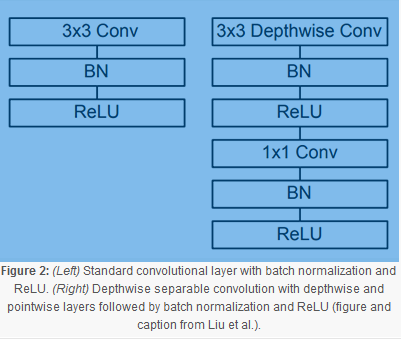

In [33]:
try:
    if not os.path.exists('object_detect_data'):
        os.makedirs('object_detect_data')
except OSError:
    print("error creating directory")

In [34]:
path='vsoutput/vs.mp4'
cap = cv2.VideoCapture(path)


In [35]:
from os.path import isfile, join
 
def convert_frames_to_video(pathIn,pathOut,fps):
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
 
    #for sorting the file names properly
    files.sort(key = lambda x: int(x[5:-4]))
 
    for i in range(len(files)):
        filename=pathIn + files[i]
        #reading each files
        img = cv2.imread(filename)
        height, width, layers = img.shape
        print(img.shape)
        size = (width,height)
        print(filename)
        #inserting the frames into an image array
        frame_array.append(img)
 
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
 
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()

In [36]:
frame_array = []
fps = cap.get(cv2.CAP_PROP_FPS)
while(True):
    ret,image =cap.read()
    
    
    name = './/object_detect_data//frame'+str(cno)+'.jpg'
    if not ret:
        break
    (h, w) = image.shape[:2]
    size=(w,h)
    print(h,w)
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)
    print("[INFO] computing object detections...")
    net.setInput(blob)
    detections = net.forward()
    for i in np.arange(0, detections.shape[2]):
    	confidence = detections[0, 0, i, 2]
    	if confidence > 0.4:
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
            print("[INFO] {}".format(label))
            cv2.rectangle(image, (startX, startY), (endX, endY),COLORS[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(image, label, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
    #cv2.imwrite(name,image)
    frame_array.append(image)
    cno+=1
    
out = cv2.VideoWriter('odetectout/ons.mp4',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()

240 294
[INFO] computing object detections...
240 294
[INFO] computing object detections...
240 294
[INFO] computing object detections...
240 294
[INFO] computing object detections...
240 294
[INFO] computing object detections...
[INFO] person: 85.74%
240 294
[INFO] computing object detections...
[INFO] person: 84.18%
240 294
[INFO] computing object detections...
240 294
[INFO] computing object detections...
240 294
[INFO] computing object detections...
[INFO] person: 44.38%
240 294
[INFO] computing object detections...
240 294
[INFO] computing object detections...
[INFO] person: 87.96%
240 294
[INFO] computing object detections...
240 294
[INFO] computing object detections...
[INFO] person: 80.68%
[INFO] person: 79.38%
240 294
[INFO] computing object detections...
[INFO] person: 42.61%
240 294
[INFO] computing object detections...
[INFO] person: 41.84%
240 294
[INFO] computing object detections...
240 294
[INFO] computing object detections...
240 294
[INFO] computing object detections

[INFO] person: 99.37%
[INFO] person: 98.44%
240 294
[INFO] computing object detections...
[INFO] person: 99.45%
[INFO] person: 98.69%
240 294
[INFO] computing object detections...
[INFO] person: 99.50%
[INFO] person: 97.05%
240 294
[INFO] computing object detections...
[INFO] person: 99.49%
[INFO] person: 98.37%
240 294
[INFO] computing object detections...
[INFO] person: 99.70%
[INFO] person: 99.20%
240 294
[INFO] computing object detections...
[INFO] person: 99.20%
[INFO] person: 73.86%
240 294
[INFO] computing object detections...
[INFO] person: 99.24%
240 294
[INFO] computing object detections...
[INFO] person: 98.89%
240 294
[INFO] computing object detections...
[INFO] person: 96.16%
240 294
[INFO] computing object detections...
[INFO] person: 95.78%
240 294
[INFO] computing object detections...
[INFO] person: 93.00%
240 294
[INFO] computing object detections...
[INFO] person: 94.48%
[INFO] person: 83.99%
240 294
[INFO] computing object detections...
[INFO] person: 85.47%
[INFO] p

[INFO] person: 97.34%
240 294
[INFO] computing object detections...
[INFO] person: 96.15%
240 294
[INFO] computing object detections...
[INFO] person: 96.06%
[INFO] person: 56.05%
240 294
[INFO] computing object detections...
[INFO] person: 96.07%
[INFO] person: 93.90%
240 294
[INFO] computing object detections...
[INFO] person: 97.35%
[INFO] person: 49.31%
240 294
[INFO] computing object detections...
[INFO] person: 97.28%
240 294
[INFO] computing object detections...
[INFO] person: 96.66%
[INFO] person: 48.75%
240 294
[INFO] computing object detections...
[INFO] diningtable: 44.67%
[INFO] person: 77.17%
240 294
[INFO] computing object detections...
[INFO] diningtable: 79.69%
[INFO] person: 85.16%
240 294
[INFO] computing object detections...
[INFO] diningtable: 73.46%
[INFO] person: 64.30%
240 294
[INFO] computing object detections...
[INFO] diningtable: 78.86%
[INFO] person: 50.12%
240 294
[INFO] computing object detections...
240 294
[INFO] computing object detections...
[INFO] din

[INFO] person: 77.24%
[INFO] person: 47.14%
240 294
[INFO] computing object detections...
[INFO] person: 61.19%
[INFO] person: 40.12%
240 294
[INFO] computing object detections...
[INFO] person: 77.27%
[INFO] person: 69.08%
240 294
[INFO] computing object detections...
[INFO] diningtable: 57.99%
[INFO] person: 66.80%
240 294
[INFO] computing object detections...
[INFO] diningtable: 49.62%
[INFO] person: 78.12%
[INFO] person: 69.44%
240 294
[INFO] computing object detections...
[INFO] person: 97.30%
[INFO] person: 86.26%
240 294
[INFO] computing object detections...
[INFO] person: 94.29%
[INFO] person: 91.81%
240 294
[INFO] computing object detections...
[INFO] diningtable: 92.73%
[INFO] person: 86.71%
240 294
[INFO] computing object detections...
[INFO] car: 71.06%
[INFO] diningtable: 84.94%
[INFO] person: 80.80%
[INFO] person: 60.28%
240 294
[INFO] computing object detections...
[INFO] car: 68.72%
[INFO] diningtable: 91.36%
[INFO] person: 83.11%
[INFO] person: 42.07%
240 294
[INFO] co

[INFO] diningtable: 92.33%
240 294
[INFO] computing object detections...
[INFO] diningtable: 87.36%
240 294
[INFO] computing object detections...
[INFO] diningtable: 89.53%
240 294
[INFO] computing object detections...
[INFO] diningtable: 87.01%
240 294
[INFO] computing object detections...
[INFO] diningtable: 83.59%
240 294
[INFO] computing object detections...
[INFO] diningtable: 51.43%
240 294
[INFO] computing object detections...
[INFO] diningtable: 92.00%
240 294
[INFO] computing object detections...
[INFO] diningtable: 74.17%
240 294
[INFO] computing object detections...
[INFO] diningtable: 80.02%
240 294
[INFO] computing object detections...
[INFO] diningtable: 76.48%
240 294
[INFO] computing object detections...
[INFO] diningtable: 83.42%
[INFO] person: 49.10%
[INFO] sofa: 48.58%
240 294
[INFO] computing object detections...
[INFO] diningtable: 78.09%
[INFO] sofa: 47.27%
240 294
[INFO] computing object detections...
[INFO] diningtable: 77.06%
[INFO] person: 54.44%
[INFO] sofa: 

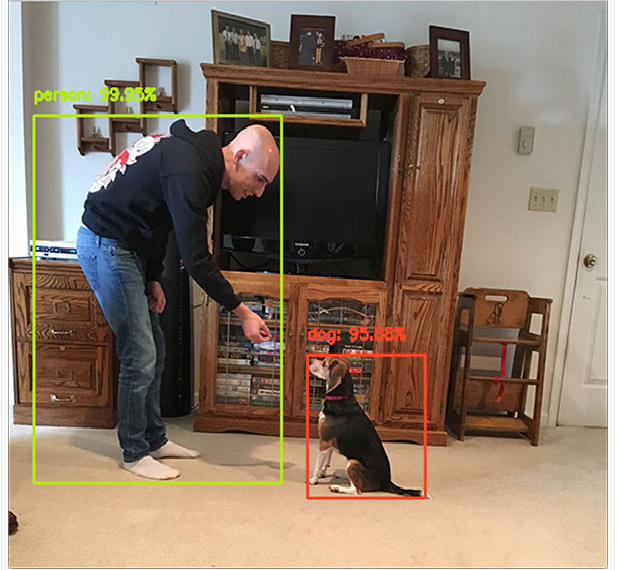

In [14]:
cap.release()

In [15]:
convert_frames_to_video('./object_detect_data/','odetectout/ons.mp4',fps)

(240, 294, 3)
./object_detect_data/frame3647.jpg
(240, 294, 3)
./object_detect_data/frame3648.jpg
(240, 294, 3)
./object_detect_data/frame3649.jpg
(240, 294, 3)
./object_detect_data/frame3650.jpg
(240, 294, 3)
./object_detect_data/frame3651.jpg
(240, 294, 3)
./object_detect_data/frame3652.jpg
(240, 294, 3)
./object_detect_data/frame3653.jpg
(240, 294, 3)
./object_detect_data/frame3654.jpg
(240, 294, 3)
./object_detect_data/frame3655.jpg
(240, 294, 3)
./object_detect_data/frame3656.jpg
(240, 294, 3)
./object_detect_data/frame3657.jpg
(240, 294, 3)
./object_detect_data/frame3658.jpg
(240, 294, 3)
./object_detect_data/frame3659.jpg
(240, 294, 3)
./object_detect_data/frame3660.jpg
(240, 294, 3)
./object_detect_data/frame3661.jpg
(240, 294, 3)
./object_detect_data/frame3662.jpg
(240, 294, 3)
./object_detect_data/frame3663.jpg
(240, 294, 3)
./object_detect_data/frame3664.jpg
(240, 294, 3)
./object_detect_data/frame3665.jpg
(240, 294, 3)
./object_detect_data/frame3666.jpg
(240, 294, 3)
./obje

(240, 294, 3)
./object_detect_data/frame3848.jpg
(240, 294, 3)
./object_detect_data/frame3849.jpg
(240, 294, 3)
./object_detect_data/frame3850.jpg
(240, 294, 3)
./object_detect_data/frame3851.jpg
(240, 294, 3)
./object_detect_data/frame3852.jpg
(240, 294, 3)
./object_detect_data/frame3853.jpg
(240, 294, 3)
./object_detect_data/frame3854.jpg
(240, 294, 3)
./object_detect_data/frame3855.jpg
(240, 294, 3)
./object_detect_data/frame3856.jpg
(240, 294, 3)
./object_detect_data/frame3857.jpg
(240, 294, 3)
./object_detect_data/frame3858.jpg
(240, 294, 3)
./object_detect_data/frame3859.jpg
(240, 294, 3)
./object_detect_data/frame3860.jpg
(240, 294, 3)
./object_detect_data/frame3861.jpg
(240, 294, 3)
./object_detect_data/frame3862.jpg
(240, 294, 3)
./object_detect_data/frame3863.jpg
(240, 294, 3)
./object_detect_data/frame3864.jpg
(240, 294, 3)
./object_detect_data/frame3865.jpg
(240, 294, 3)
./object_detect_data/frame3866.jpg
(240, 294, 3)
./object_detect_data/frame3867.jpg
(240, 294, 3)
./obje

(240, 294, 3)
./object_detect_data/frame4054.jpg
(240, 294, 3)
./object_detect_data/frame4055.jpg
(240, 294, 3)
./object_detect_data/frame4056.jpg
(240, 294, 3)
./object_detect_data/frame4057.jpg
(240, 294, 3)
./object_detect_data/frame4058.jpg
(240, 294, 3)
./object_detect_data/frame4059.jpg
(240, 294, 3)
./object_detect_data/frame4060.jpg
(240, 294, 3)
./object_detect_data/frame4061.jpg
(240, 294, 3)
./object_detect_data/frame4062.jpg
(240, 294, 3)
./object_detect_data/frame4063.jpg
(240, 294, 3)
./object_detect_data/frame4064.jpg
(240, 294, 3)
./object_detect_data/frame4065.jpg
(240, 294, 3)
./object_detect_data/frame4066.jpg
(240, 294, 3)
./object_detect_data/frame4067.jpg
(240, 294, 3)
./object_detect_data/frame4068.jpg
(240, 294, 3)
./object_detect_data/frame4069.jpg
(240, 294, 3)
./object_detect_data/frame4070.jpg
(240, 294, 3)
./object_detect_data/frame4071.jpg
(240, 294, 3)
./object_detect_data/frame4072.jpg
(240, 294, 3)
./object_detect_data/frame4073.jpg
